In [258]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [259]:
# Loading data into python
file_dir = '/Users/danielmalungu/Documents/avon_interview/'
data_sheet_1 = pd.read_csv(f'{file_dir}data/data_sheet_1.csv')
data_sheet_2 = pd.read_csv(f'{file_dir}data/data_sheet_2.csv')

In [260]:
# Split week column into year and week columns
data_sheet_1[['year', 'week']] = data_sheet_1.Year_Week.str.split("-", expand = True)
data_sheet_2[['year', 'week']] = data_sheet_2.Year_Week.str.split("-", expand = True)

In [261]:
# Data after split
print("Sample of sheet 1 after split: ")
data_sheet_1.sample(n=10)

Sample of sheet 1 after split: 


,Year_Week,Mobile_Indicator_Name,Platform_Type_Name,Super_Region,Country_Name,Transfer_Type,Receive_Country,Net_Sent_Amount_GBP,Net_Orders,year,week
28025,2019-W46,Desktop,Desktop,NAM,US,3-7 Day Cash Pick Up,St. Vincent and the Grenadines,955.2000,1,2019,W46
40470,2018-W48,Mobile,Mobile Web,APAC,Australia,3-7 Day Bank Transfer,Israel,238.0000,1,2018,W48
44750,2018-W48,Mobile,Mobile Web,EMEA,United Kingdom,Same Day Cash Pick Up,Zambia,164.9976,1,2018,W48
554,2019-W48,Desktop,Desktop,APAC,Australia,3-7 Day Bank Transfer,Panama,53622.0000,2,2019,W48
15937,2019-W47,Desktop,Desktop,EMEA,United Kingdom,Same Day Bank Transfer,Singapore,6543.8283,9,2019,W47
29235,2019-W46,Mobile,Mobile Web,NAM,US,Next Day Cash Pick Up,Switzerland,700.7990,3,2019,W46
49714,2018-W47,Mobile,Mobile App,LATAM,Brazil,Next Day Cash Pick Up,Argentina,-531.1641,0,2018,W47
57212,2018-W46,Mobile,Mobile Web,APAC,Australia,3-7 Day Bank Transfer,Japan,1008.7499,2,2018,W46
37395,2019-W45,Mobile,Mobile App,NAM,US,Mobile Money,Morocco,354.4194,1,2019,W45
44847,2018-W48,Mobile,Mobile Web,EMEA,United Kingdom,3-7 Day Cash Pick Up,Kenya,-74.9645,-1,2018,W48


In [262]:
print("Sample of sheet 2 after split: ")
data_sheet_1.sample(n=10)

Sample of sheet 2 after split: 


,Year_Week,Mobile_Indicator_Name,Platform_Type_Name,Super_Region,Country_Name,Transfer_Type,Receive_Country,Net_Sent_Amount_GBP,Net_Orders,year,week
14679,2019-W47,Mobile,Mobile Web,APAC,South Korea,Next Day Cash Pick Up,Philippines,2164.1035,12,2019,W47
42722,2018-W48,Desktop,Desktop,EMEA,Norway,Same Day Bank Transfer,Somaliland,88577.7309,356,2018,W48
32584,2019-W45,Desktop,Desktop,APAC,Hong Kong,Next Day Bank Transfer,Russia,1777.1435,2,2019,W45
11369,2019-W47,Mobile,Mobile App,LATAM,Brazil,Slow Bank Transfer,Peru,-97.5000,-1,2019,W47
2860,2019-W48,Desktop,Desktop,EMEA,Norway,Same Day Cash Pick Up,Chile,377.4948,1,2019,W48
48339,2018-W48,Mobile,Mobile Web,NAM,US,Next Day Bank Transfer,Tanzania,110.0000,1,2018,W48
59489,2018-W46,Desktop,Desktop,EMEA,Norway,Same Day Bank Transfer,China,418.5530,3,2018,W46
37901,2019-W45,Desktop,Desktop,NAM,US,3-7 Day Cash Pick Up,Bahrain,1505.7075,4,2019,W45
56972,2018-W46,Mobile,Mobile App,APAC,Australia,3-7 Day Cash Pick Up,Kenya,23559.2691,73,2018,W46
37500,2019-W45,Desktop,Desktop,NAM,US,Mobile Money,U.S. Virgin Islands,20026.5000,11,2019,W45


In [263]:
############################################ Cleaning the data #######################################################

In [264]:
# Mobile Indicator Name
'''
Replacing mobi, M@#3le and, mibile with Mobile for data sheet 1
'''
data_sheet_1.Mobile_Indicator_Name = data_sheet_1.Mobile_Indicator_Name.replace(['mobi', 'M@#3le' , 'mibile'],['Mobile', 'Mobile', 'Mobile'])

'''
Replacing the following values in dataset 2
Desktop => DESKTOP
Mobile => MOBILE
MBL => MOBILE
'''
data_sheet_2.Mobile_Indicator_Name = data_sheet_2.Mobile_Indicator_Name.replace(['Desktop', 'Mobile', 'MBL'], ['DESKTOP', 'MOBILE', 'MOBILE'])

In [265]:
# # Super Region
# '''
# Replacing the abbreviation of North America from NA to NAM this will reduce confusion with Note Available which is abrivated as NA in python
# '''
# data_sheet_1.Super_Region = data_sheet_1.Super_Region.replace(['NA'], ['NAM'])

In [266]:
# Transfer Type
'''
Replacing the the following values:
3~7 Day Cash Pick Up => 3-7 Day Cash Pick Up
'''
data_sheet_1.Transfer_Type = data_sheet_1.Transfer_Type.replace(['3~7 Day Cash Pick Up'],['3-7 Day Cash Pick Up'])

In [267]:
# Country Name
'''
Replacing the following values
 Algria => Algeria
Andora => Andorra
Antigua & Barbuda => Antigua and Barbuda
IND, INDONESIA, Indonasia => Indonesia
PAK, PAKISTAN, Pakistan => Pakistan
Democratic Republic of the Congo,  Republic of the Congo => Democratic Republic of the Congo
albinia => Albania
argentina => Argentina
cambodia => Cambodia
cameroon => Cameroon
canada => Canada
fiji => Fiji
india => India
kenya => Kenya;
'''

data_sheet_1.Receive_Country = data_sheet_1.Receive_Country.replace(
    ['Algeria', 'Andorra', 'Antigua & Barbuda', 'IND', 'INDONESIA', 'Indonasia', 'PAK', 'PAKISTAN', 'Pakistan', 'Republic of the Congo', 'albinia', 'argentina', 'cambodia', 'cameroon', 'canada', 'fiji', 'india', 'kenya'],
    ['Algria', 'Andora', 'Antigua and Barbuda', 'Indonasia', 'Indonasia', 'Indonasia', 'Pakistan', 'Pakistan', 'Pakistan', 'Democratic Republic of the Congo', 'Albania', 'Argentina', 'Cambodia', 'Cameroon', 'Canada', 'Fiji', 'India', 'Kenya'])

In [268]:
############################################ Uni-variate Analysis #######################################################
'''
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only  one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.
Frequency Distribution Tables, Bar Charts, Histograms will be used to describe that data
'''

'\nUnivariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only  one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.\nFrequency Distribution Tables, Bar Charts, Histograms will be used to describe that data\n'

Frequency tables of Mobile Indicator 

Mobile     38640
Desktop    35048
Name: Mobile_Indicator_Name, dtype: int64 

Proportion of Mobile Indicator
Mobile     0.524373
Desktop    0.475627
Name: Mobile_Indicator_Name, dtype: float64 

Histogram of Mobile Indicator Name




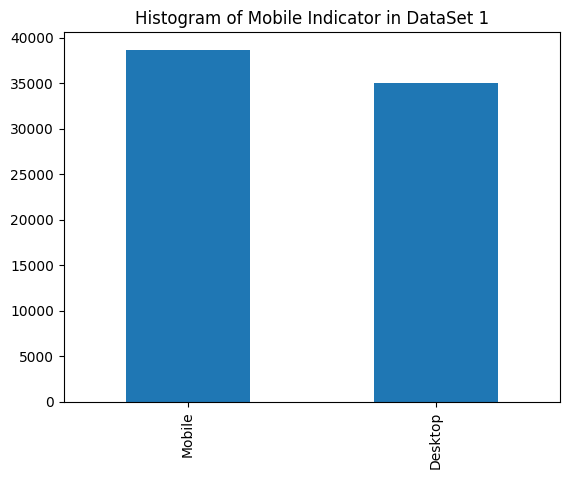

In [269]:
# Mobile Indicator Name dataset 1
# Frequency tables of Mobile Indicator Name
print("Frequency tables of Mobile Indicator \n")
freq_Mobile_Indicator_1=data_sheet_1.Mobile_Indicator_Name.value_counts()
print(freq_Mobile_Indicator_1, '\n')
# Proportion of Mobile Indicator Name
print('Proportion of Mobile Indicator')
prop_Mobile_Indicator_1=data_sheet_1.Mobile_Indicator_Name.value_counts(normalize=True)
print(prop_Mobile_Indicator_1, '\n')

# Histogram of Mobile Indicator Name
print('Histogram of Mobile Indicator Name')
hist__Mobile_Indicator_1=data_sheet_1.Mobile_Indicator_Name.value_counts().plot.bar(title='Histogram of Mobile Indicator in DataSet 1')
print('\n')

Frequency tables of Mobile Indicator 

MOBILE     112
DESKTOP     56
Name: Mobile_Indicator_Name, dtype: int64 

Proportion of Mobile Indicator
MOBILE     0.666667
DESKTOP    0.333333
Name: Mobile_Indicator_Name, dtype: float64 

Histogram of Mobile Indicator Name




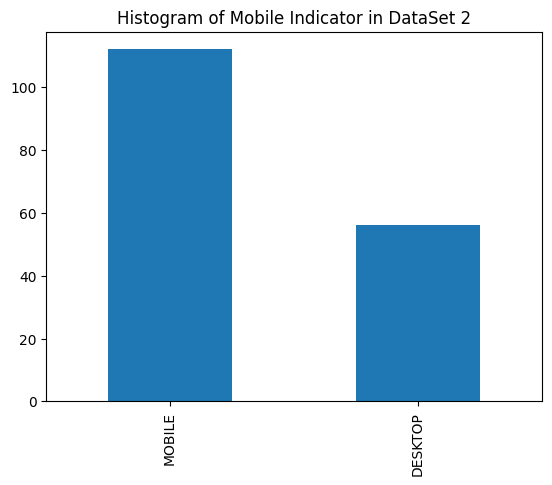

In [270]:
# Mobile Indicator Name dataset 2
# Frequency tables of Mobile Indicator Name
print("Frequency tables of Mobile Indicator \n")
freq_Mobile_Indicator_2=data_sheet_2.Mobile_Indicator_Name.value_counts()
print(freq_Mobile_Indicator_2, '\n')

# Proportion table of Mobile Indicator Name
print('Proportion of Mobile Indicator')
prop_Mobile_Indicator_2=data_sheet_2.Mobile_Indicator_Name.value_counts(normalize=True)
print(prop_Mobile_Indicator_2, '\n')

# Histogram of Mobile Indicator Name
print('Histogram of Mobile Indicator Name')
hist__Mobile_Indicator_2=data_sheet_2.Mobile_Indicator_Name.value_counts().plot.bar(title='Histogram of Mobile Indicator in DataSet 2')
print('\n')

Frequency tables of Platform Type 

Desktop       35048
Mobile Web    19852
Mobile App    18788
Name: Platform_Type_Name, dtype: int64 

Proportion table of Platform Type
Desktop       0.475627
Mobile Web    0.269406
Mobile App    0.254967
Name: Platform_Type_Name, dtype: float64 

Histogram of Mobile Indicator Name




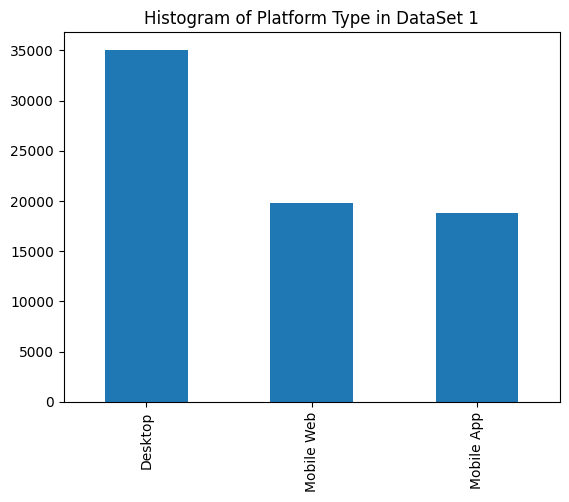

In [271]:
# Platform Type Name dataset 1
# Frequency tables of Platform Type
print("Frequency tables of Platform Type \n")
freq_Platform_Type_1=data_sheet_1.Platform_Type_Name.value_counts()
print(freq_Platform_Type_1, '\n')

# Proportion table of Platform Type
print('Proportion table of Platform Type')
prop_Platform_Type_1=data_sheet_1.Platform_Type_Name.value_counts(normalize=True)
print(prop_Platform_Type_1, '\n')

# Histogram of Platform Type
print('Histogram of Mobile Indicator Name')
hist_Platform_Type_1=data_sheet_1.Platform_Type_Name.value_counts().plot.bar(title='Histogram of Platform Type in DataSet 1')
print('\n')

Frequency tables of Platform Type 

Mobile Web    56
Desktop       56
Mobile App    56
Name: Platform_Type_Name, dtype: int64 

Proportion table of Platform Type
Mobile Web    0.333333
Desktop       0.333333
Mobile App    0.333333
Name: Platform_Type_Name, dtype: float64 

Histogram of Mobile Indicator Name




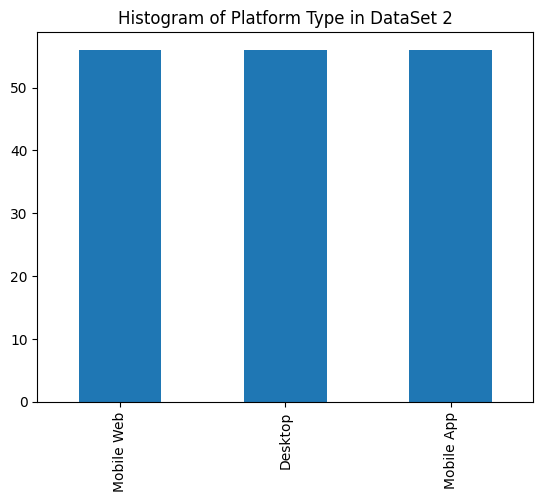

In [272]:
# Platform Type Name dataset 2
# Frequency tables of Platform Type
print("Frequency tables of Platform Type \n")
freq_Platform_Type_2=data_sheet_2.Platform_Type_Name.value_counts()
print(freq_Platform_Type_2, '\n')

# Proportion table of Platform Type
print('Proportion table of Platform Type')
prop_Platform_Type_2=data_sheet_2.Platform_Type_Name.value_counts(normalize=True)
print(prop_Platform_Type_2, '\n')

# Histogram of Platform Type
print('Histogram of Mobile Indicator Name')
hist_Platform_Type_2=data_sheet_2.Platform_Type_Name.value_counts().plot.bar(title='Histogram of Platform Type in DataSet 2')
print('\n')

Frequency tables of Super Region 

APAC     23805
EMEA     23477
NAM      20265
LATAM     6141
Name: Super_Region, dtype: int64 

Proportion table of Super Region
APAC     0.323051
EMEA     0.318600
NAM      0.275011
LATAM    0.083338
Name: Super_Region, dtype: float64 

Histogram of Super Region




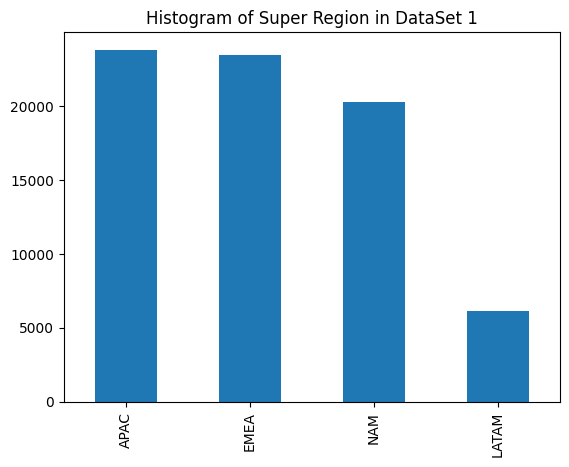

In [273]:
# Super Region dataset 1
# Frequency tables of Super Region
print("Frequency tables of Super Region \n")
freq_Super_Region_1=data_sheet_1.Super_Region.value_counts()
print(freq_Super_Region_1, '\n')

# Proportion table of Super Region
print('Proportion table of Super Region')
prop_Super_Region_1=data_sheet_1.Super_Region.value_counts(normalize=True)
print(prop_Super_Region_1, '\n')

# Histogram of Super Region
print('Histogram of Super Region')
hist_Super_Region_1=data_sheet_1.Super_Region.value_counts().plot.bar(title='Histogram of Super Region in DataSet 1')
print('\n')

Frequency tables of Super Region 

APAC     72
EMEA     48
NAM      24
LATAM    24
Name: Super_Region, dtype: int64 

Proportion table of Super Region
APAC     0.428571
EMEA     0.285714
NAM      0.142857
LATAM    0.142857
Name: Super_Region, dtype: float64 

Histogram of Super Region




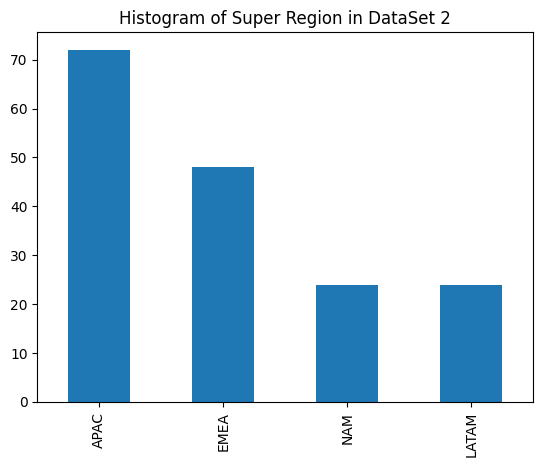

In [274]:
# Super Region dataset 2
# Frequency tables of Super Region
print("Frequency tables of Super Region \n")
freq_Super_Region_2=data_sheet_2.Super_Region.value_counts()
print(freq_Super_Region_2, '\n')

# Proportion table of Super Region
print('Proportion table of Super Region')
prop_Super_Region_2=data_sheet_2.Super_Region.value_counts(normalize=True)
print(prop_Super_Region_2, '\n')

# Histogram of Super Region
print('Histogram of Super Region')
hist_Super_Region_2=data_sheet_2.Super_Region.value_counts().plot.bar(title='Histogram of Super Region in DataSet 2')
print('\n')

In [275]:
# Country Name
# Frequency tables of Country Name
print("Frequency tables of Country Name \n")
freq_Country_Name_1=data_sheet_1.Country_Name.value_counts()
print(freq_Country_Name_1, '\n')

Frequency tables of Country Name 

US                20265
United Kingdom    14873
South Korea        9878
Norway             8604
Australia          7225
Hong Kong          6702
Brazil             6141
Name: Country_Name, dtype: int64 



In [276]:
# Country Name
# Frequency tables of Country Name
print("Frequency tables of Country Name \n")
freq_Country_Name_2=data_sheet_2.Country_Name.value_counts()
print(freq_Country_Name_2, '\n')

Frequency tables of Country Name 

Norway            24
Australia         24
US                24
South Korea       24
United Kingdom    24
Hong Kong         24
Brazil            24
Name: Country_Name, dtype: int64 



Frequency tables of Transfer Type 

Same Day Cash Pick Up     9331
3-7 Day Cash Pick Up      9080
Mobile Money              8529
Next Day Bank Transfer    8243
Next Day Cash Pick Up     8175
3-7 Day Bank Transfer     8084
Same Day Bank Transfer    8018
Slow Bank Transfer        7131
Slow Cash Pick Up         7057
Unknown                     40
Name: Transfer_Type, dtype: int64 

Proportion table of Transfer Type
Same Day Cash Pick Up     0.126628
3-7 Day Cash Pick Up      0.123222
Mobile Money              0.115745
Next Day Bank Transfer    0.111864
Next Day Cash Pick Up     0.110941
3-7 Day Bank Transfer     0.109706
Same Day Bank Transfer    0.108810
Slow Bank Transfer        0.096773
Slow Cash Pick Up         0.095769
Unknown                   0.000543
Name: Transfer_Type, dtype: float64 

Histogram of Transfer Type




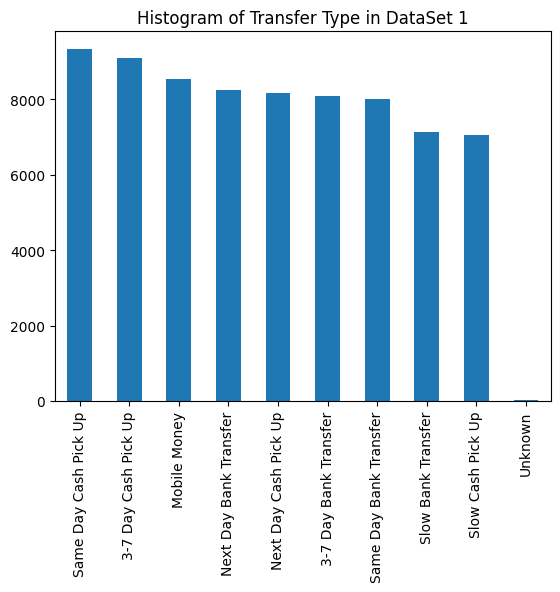

In [277]:
# Transfer Type dataset 1
# Frequency tables of Transfer Type
print("Frequency tables of Transfer Type \n")
freq_Transfer_Type_1=data_sheet_1.Transfer_Type.value_counts()
print(freq_Transfer_Type_1, '\n')

# Proportion table of Super Region
print('Proportion table of Transfer Type')
prop_Transfer_Type_1=data_sheet_1.Transfer_Type.value_counts(normalize=True)
print(prop_Transfer_Type_1, '\n')

# Histogram of Super Region
print('Histogram of Transfer Type')
hist_Transfer_Type_1=data_sheet_1.Transfer_Type.value_counts().plot.bar(title='Histogram of Transfer Type in DataSet 1')
print('\n')

Frequency tables of Receive Country 

Nigeria                           1724
Ghana                             1629
Kenya                             1605
Thailand                          1439
France                            1406
                                  ... 
Chad                                 2
Eritrea                              1
Comoros                              1
Cocos Islands                        1
Federated States of Micronesia       1
Name: Receive_Country, Length: 200, dtype: int64 

Proportion table of Receive Country
Nigeria                           0.023396
Ghana                             0.022107
Kenya                             0.021781
Thailand                          0.019528
France                            0.019080
                                    ...   
Chad                              0.000027
Eritrea                           0.000014
Comoros                           0.000014
Cocos Islands                     0.000014
Federated States

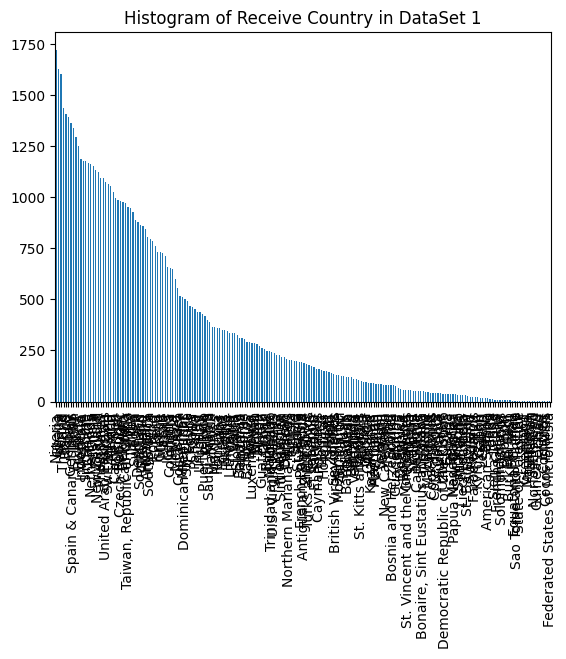

In [278]:
# Receive Country dataset 1
# Frequency tables of Receive Country
print("Frequency tables of Receive Country \n")
freq_Receive_Country_1=data_sheet_1.Receive_Country.value_counts()
print(freq_Receive_Country_1, '\n')

# Proportion table of Receive Country
print('Proportion table of Receive Country')
prop_Receive_Country_1=data_sheet_1.Receive_Country.value_counts(normalize=True)
print(prop_Receive_Country_1, '\n')

# Histogram of Receive Country
print('Histogram of Receive Country')
hist_Receive_Country_1=data_sheet_1.Receive_Country.value_counts().plot.bar(title='Histogram of Receive Country in DataSet 1')
print('\n')

                     Net_Sent_Amount_GBP  Net_Orders
Net_Sent_Amount_GBP             1.000000    0.678984
Net_Orders                      0.678984    1.000000


<AxesSubplot: >

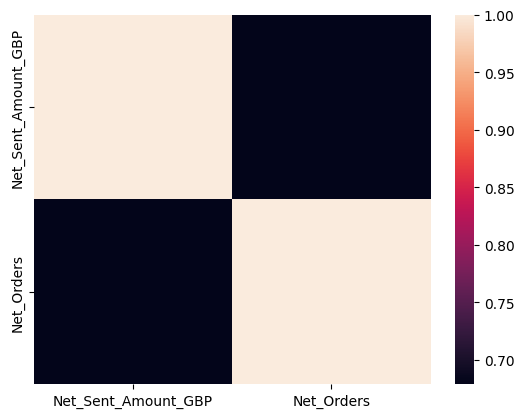

In [279]:

# Correlation between numerical values
matrix=data_sheet_1.corr(numeric_only = True)
print(matrix)
sbn.heatmap(matrix)

In [280]:
# Creating data subset for each year by diving the data into 2018 and 2019


In [281]:
# dataset 1
data_filter_1 = data_sheet_1['year']=='2019'
data_sheet_1_2018 = data_sheet_1.where(data_filter_1, inplace=False)
print(data_sheet_1_2018.sample(n=10))

      Year_Week Mobile_Indicator_Name Platform_Type_Name Super_Region  \
48685       NaN                   NaN                NaN          NaN   
41523       NaN                   NaN                NaN          NaN   
27579  2019-W46               Desktop            Desktop          NAM   
49741       NaN                   NaN                NaN          NaN   
41933       NaN                   NaN                NaN          NaN   
23026  2019-W46                Mobile         Mobile Web         EMEA   
54597       NaN                   NaN                NaN          NaN   
5724   2019-W48               Desktop            Desktop         EMEA   
13038  2019-W47                Mobile         Mobile Web         EMEA   
65380       NaN                   NaN                NaN          NaN   

         Country_Name           Transfer_Type Receive_Country  \
48685             NaN                     NaN             NaN   
41523             NaN                     NaN             NaN   
2

In [282]:
# dataset 2
data_filter_2 = data_sheet_2['year']=='2018'
data_sheet_2_2018 = data_sheet_2.where(data_filter_2, inplace=False).dropna()
print(data_sheet_2_2018.sample(n=10))

    Year_Week Super_Region    Country_Name Mobile_Indicator_Name  \
29   2018-W47         APAC     South Korea                MOBILE   
104  2018-W45          NAM              US               DESKTOP   
149  2018-W48         APAC       Australia                MOBILE   
89   2018-W48         APAC       Hong Kong                MOBILE   
30   2018-W47         APAC     South Korea                MOBILE   
153  2018-W46         APAC       Australia               DESKTOP   
35   2018-W48         APAC       Australia                MOBILE   
48   2018-W48         APAC       Hong Kong                MOBILE   
112  2018-W46          NAM              US                MOBILE   
43   2018-W45         EMEA  United Kingdom                MOBILE   

    Platform_Type_Name     Visits  year week  
29          Mobile App    95394.0  2018  W47  
104            Desktop  3004498.0  2018  W45  
149         Mobile App    31440.0  2018  W48  
89          Mobile Web    90589.0  2018  W48  
30          Mobi

Text(0.5, 1.0, 'Site vist vs Weeks of 2018 for LATAM')

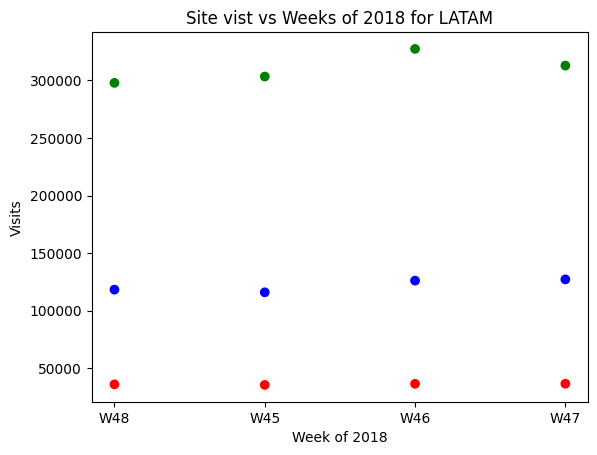

In [283]:
# Super Regional analysis for 2018 LATAM (dataset 2) vs Visits
LATAM_dataset_2_2018 = data_sheet_2_2018.where(data_sheet_2_2018.Super_Region=='LATAM', inplace=False).dropna()
data_color = {'Mobile App':'red', 'Desktop': 'green', 'Mobile Web':'blue'}
plt.scatter(x= LATAM_dataset_2_2018.week, y=LATAM_dataset_2_2018.Visits, c=LATAM_dataset_2_2018.Platform_Type_Name.map(data_color))
plt.xlabel("Week of 2018")
plt.ylabel('Visits')
plt.title('Site vist vs Weeks of 2018 for LATAM')

Text(0.5, 1.0, 'Site vist vs Weeks of 2018 for LATAM')

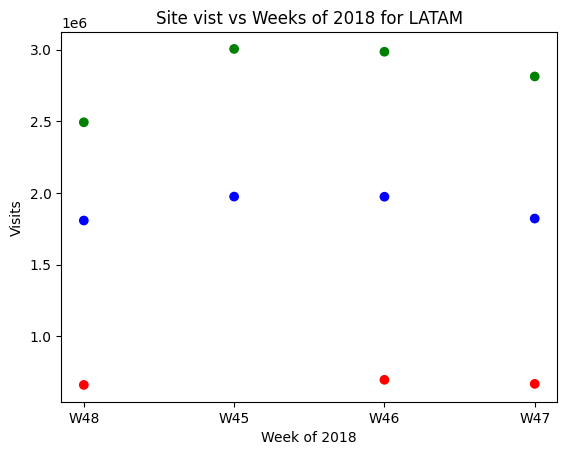

In [284]:
# Super Regional analysis for 2018 LATAM (dataset 2) vs Visits
LATAM_dataset_2_2018 = data_sheet_2_2018.where(data_sheet_2_2018.Super_Region=='NAM', inplace=False).dropna()
data_color = {'Mobile App':'red', 'Desktop': 'green', 'Mobile Web':'blue'}
plt.scatter(x= LATAM_dataset_2_2018.week, y=LATAM_dataset_2_2018.Visits, c=LATAM_dataset_2_2018.Platform_Type_Name.map(data_color))
plt.xlabel("Week of 2018")
plt.ylabel('Visits')
plt.title('Site vist vs Weeks of 2018 for LATAM')

Text(0.5, 1.0, 'Site vist vs Weeks of 2018 for LATAM')

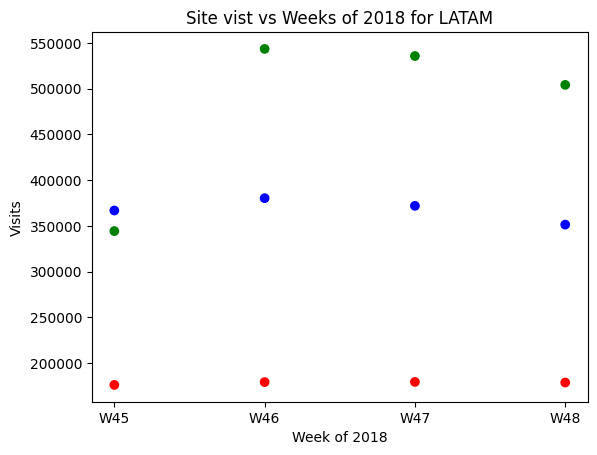

In [285]:
# Super Regional analysis for 2018 LATAM (dataset 2) vs Visits
LATAM_dataset_2_2018 = data_sheet_2_2018.where(data_sheet_2_2018.Super_Region=='APAC', inplace=False).dropna()[['Platform_Type_Name', 'week', 'Visits']].groupby(['week', 'Platform_Type_Name']).sum(numeric_only = True).reset_index()
data_color = {'Mobile App':'red', 'Desktop': 'green', 'Mobile Web':'blue'}
plt.scatter(x= LATAM_dataset_2_2018['week'], y=LATAM_dataset_2_2018.Visits, c=LATAM_dataset_2_2018.Platform_Type_Name.map(data_color))
plt.xlabel("Week of 2018")
plt.ylabel('Visits')
plt.title('Site vist vs Weeks of 2018 for LATAM')

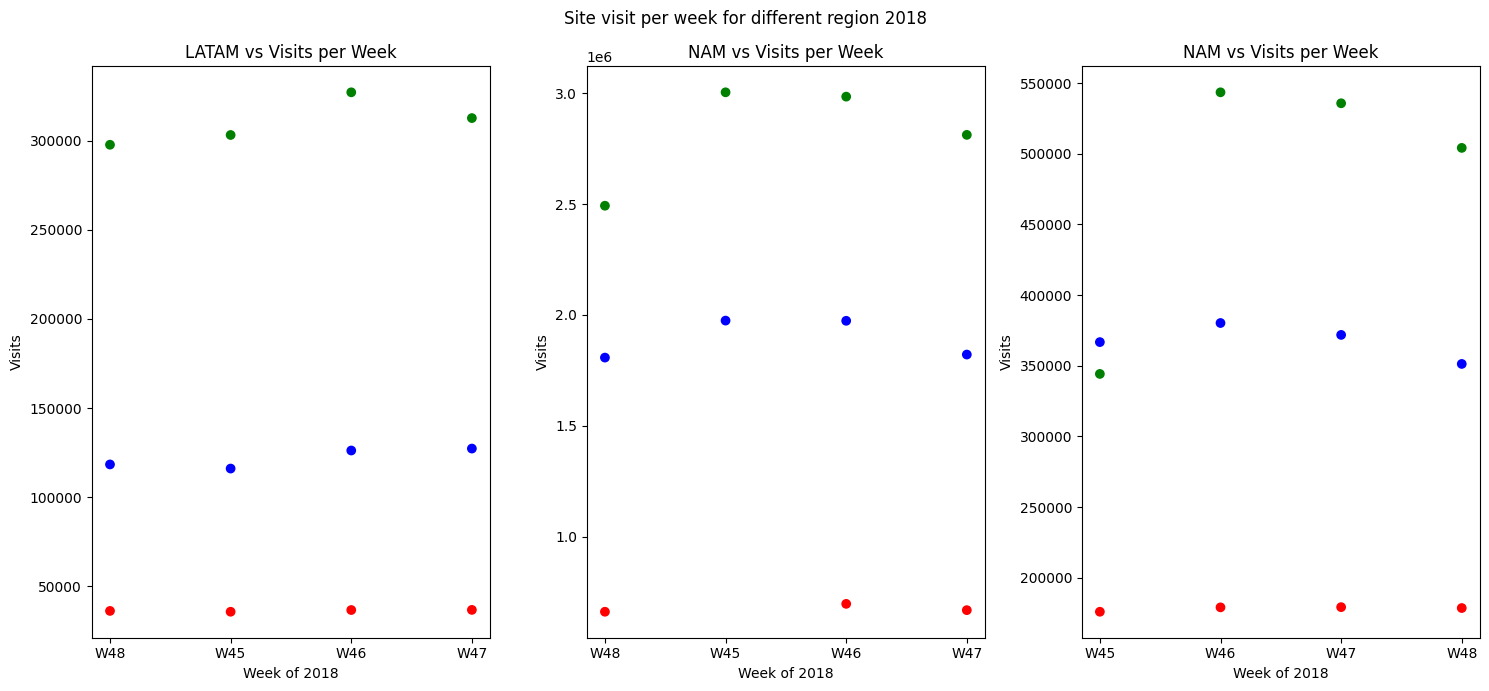

In [286]:
fig, axis = plt.subplots(1, 3, figsize=(15, 7))
fig.suptitle("Site visit per week for different region 2018")
data_color = {'Mobile App':'red', 'Desktop': 'green', 'Mobile Web':'blue'}

# Super Regional analysis for 2018 LATAM vs Visits
LATAM_dataset_2_2018 = data_sheet_2_2018.where(data_sheet_2_2018.Super_Region=='LATAM', inplace=False).dropna()
axis[0].scatter(x= LATAM_dataset_2_2018.week, y=LATAM_dataset_2_2018.Visits, c=LATAM_dataset_2_2018.Platform_Type_Name.map(data_color))
axis[0].set_title('LATAM vs Visits per Week')
axis[0].set_xlabel('Week of 2018')
axis[0].set_ylabel('Visits')

# Super Region analysis for 2018 NAM vs Visits
NAM_dataset_2_2018 = data_sheet_2_2018.where(data_sheet_2_2018.Super_Region=='NAM', inplace=False).dropna()
axis[1].scatter(x= NAM_dataset_2_2018.week, y=NAM_dataset_2_2018.Visits, c=NAM_dataset_2_2018.Platform_Type_Name.map(data_color))
axis[1].set_title('NAM vs Visits per Week')
axis[1].set_xlabel('Week of 2018')
axis[1].set_ylabel('Visits')

# Super Region analysis for 2018 APAC vs Visits
APAC_dataset_2_2018 = data_sheet_2_2018.where(data_sheet_2_2018.Super_Region=='APAC', inplace=False).dropna()[['Platform_Type_Name', 'week', 'Visits']].groupby(['week', 'Platform_Type_Name']).sum(numeric_only = True).reset_index()
axis[2].scatter(x= APAC_dataset_2_2018['week'], y=APAC_dataset_2_2018.Visits, c=APAC_dataset_2_2018.Platform_Type_Name.map(data_color))
axis[2].set_title('NAM vs Visits per Week')
axis[2].set_xlabel('Week of 2018')
axis[2].set_ylabel('Visits')
fig.tight_layout()

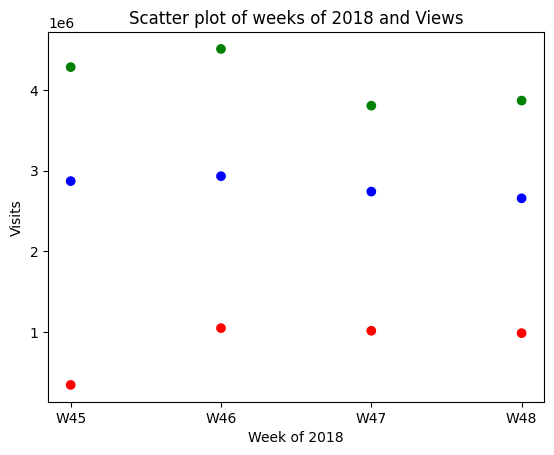

In [287]:
# All views vs Weeks in 2018
data_color = {'Mobile App':'red', 'Desktop': 'green', 'Mobile Web':'blue'}
APAC_dataset_2_2018 = data_sheet_2_2018[['Platform_Type_Name', 'week', 'Visits']].groupby(['week', 'Platform_Type_Name']).sum(numeric_only = True).reset_index()
plt.scatter(x= APAC_dataset_2_2018['week'], y=APAC_dataset_2_2018.Visits, c=APAC_dataset_2_2018.Platform_Type_Name.map(data_color))
plt.title('Scatter plot of weeks of 2018 and Views')
plt.xlabel('Week of 2018')
plt.ylabel('Visits')
plt.show()